### Question 3

You are asked to analyse some user data from the Antarctica Hub website, provided in the 'website data' sheet of the excel. Here you have the estimated wait time users face before they are able to login to the Hub as well as number of users/visitors to the Hub website that hour.

For 3.1, 3.2, 3.3 and 3.4 DO NOT USE ANY EMPIRICAL/KERNEL DISTRIBUTIONS.

3.1

- Find and specify the distributions of the estimated wait time and the number of hourly visitors, giving reasons for each.

3.2

- Using your fitted distributions, calculate:

i) the probability that the estimated wait time is greater than 10 minutes

ii) The probability that the number of visitors is less than 46

3.3

- What is the relationship between these two sets of data? How can we model this (if at all)?

3.4

- Rana is not happy with the current website. She has received many complaints of clients taking far too long to login. You wonder whether the system is being overwhelmed by large numbers of visitors. Calculate the probability that when we have 50 or more visitors per hour, they can expect to wait more than 7.5 minutes to log on.

3.5

- You are provided with an additional set of returns data, for 10 assets A-J, in the 'tick data' sheet of the excel. Some of these asset returns are genuine, whilst others have been simulated. Determine which assets are real and which are fake/simulated, explaining in detail how you did so.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import lognorm
from scipy.stats import norm
from scipy.stats import normaltest
from scipy.stats import chisquare
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
data = pd.read_excel('data.xlsx', 'website data')

In [3]:
data.head()

,estimated wait time (mins),number of visitors
0,4.685197,67
1,4.629674,49
2,3.881256,59
3,14.687116,78
4,2.784163,57


Some observations:
- wait time is a continious variable
- number of visitors is discrete

In [4]:
visitor_data = data['number of visitors']
wait_time_data = data['estimated wait time (mins)']

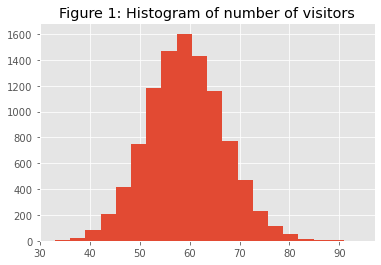

In [5]:
visitor_data.hist(bins = 20)
plt.title('Figure 1: Histogram of number of visitors')
plt.show()

Visually, it seems that the number of visitors follows a normal distribution.

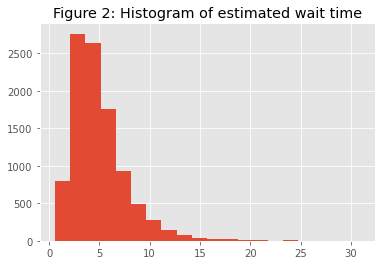

In [6]:
wait_time_data.hist(bins = 20)
plt.title('Figure 2: Histogram of estimated wait time')
plt.show()

Visually we can see that the estimated wait time does not follow a normal distribution.

### 3.1 Find and specify the distributions of the estimated wait time and the number of visitors, giving reasons for each

In [7]:
visitor_data_normal = (visitor_data - visitor_data.mean()) / visitor_data.std()

/Users/robertblomqvist/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


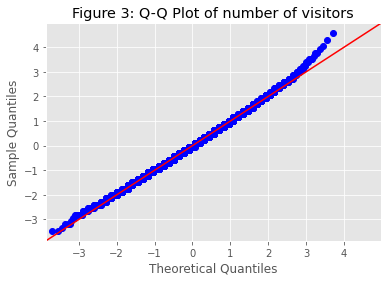

In [8]:
fig = sm.qqplot(visitor_data_normal, line='45')
plt.title('Figure 3: Q-Q Plot of number of visitors')
plt.show()

Applying a Q-Q plot onto the number of visitor data shows that the distribution is somewhat normal, although there exists some heavy tails to the right of the distribution. Given it's a discrete distribution, the line shows a 'zigzag' pattern.

In [9]:
visitor_norm = norm(visitor_data.mean(), visitor_data.std())

In [10]:
visitors_min = visitor_data.min()
visitors_max = visitor_data.max()

values = [value for value in range(visitors_min, visitors_max)]
probabilities = [visitor_norm.pdf(value) for value in values]

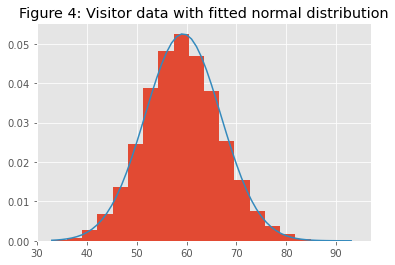

In [11]:
plt.hist(visitor_data, bins = 20, density = True)
plt.plot(values, probabilities)
plt.title('Figure 4: Visitor data with fitted normal distribution')
plt.show()

Given Figures 1, 3 and 4 it seems fair to say that the number of visitors follows a normal distribution.

Given the number of visitors data (visitor_data) is discrete, we can use chisquare to assess normality, as below.

In [12]:
chisq_stat, chisq_pval = chisquare(visitor_data)
print('The ChiSquare statistic for the visitor data is:', round(chisq_stat, 5))
print('The ChiSquare p-value for the visitor data is:', round(chisq_pval, 5))

The ChiSquare statistic for the visitor data is: 9739.28161
The ChiSquare p-value for the visitor data is: 0.9677


Given the chisquare statistic is high, and the p-value is significantly above 5%, we can accept that the data likely comes from a normal distribution.

Below, we try a transformation of the raw wait time data, namely a log transformation.

In [13]:
wait_time_log = np.log(wait_time_data)
wait_time_lognorm = (wait_time_log - wait_time_log.mean()) / wait_time_log.std()

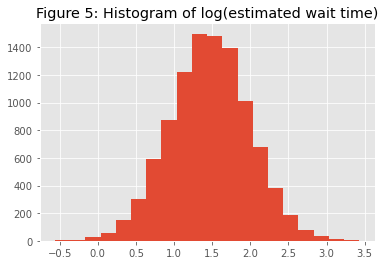

In [14]:
wait_time_log.hist(bins = 20)
plt.title('Figure 5: Histogram of log(estimated wait time)')
plt.show()

Figure 5 suggests that log(estimated wait time) follows a normal distribution, that is, estimated wait time is log-normal. As this is a continious variable, we can use other tests to assess normality.

/Users/robertblomqvist/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


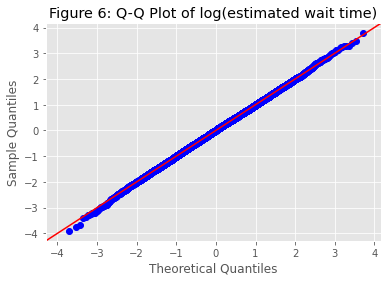

In [15]:
fig = sm.qqplot(wait_time_lognorm, line='45')
plt.title('Figure 6: Q-Q Plot of log(estimated wait time)')
plt.show()

Figure 6 seems to confirm our visual intuition that estimated wait time follows a lognormal process.

We can look at it from a statistical point of view by applying the Kolmogorov-Smirnov test to the log of wait time, as below

In [16]:
ks_stat_wt_log, ks_pval_wt_log = kstest(wait_time_lognorm, 'norm')
print('The K-S statistic is:', round(ks_stat_wt_log, 5))
print('The K-S p-value is:', round(ks_pval_wt_log, 5))

The K-S statistic is: 0.00625
The K-S p-value is: 0.82682


Smaller K-S values indicate a better fit between the two distributions of interest (in our case, log(wait time) and a normal distribution). So, with a K-S statistic of 0.00625 (which essentially measures the differences between the CDF of the two distributions of interest), we are confident that the log of wait time comes from a normal distribution.

Additionally, the p-value is 0.827, indicating that we can accept the finding.

## 3.2 i) probability that the wait time is greater than 10 minutes

In [17]:
wait_time_log_mean = wait_time_log.mean()
wait_time_log_std = wait_time_log.std()

In [18]:
est_wt_log_norm = norm(wait_time_log_mean, wait_time_log_std)

values_wait_time = np.arange(wait_time_log.min(), wait_time_log.max(), 0.01)

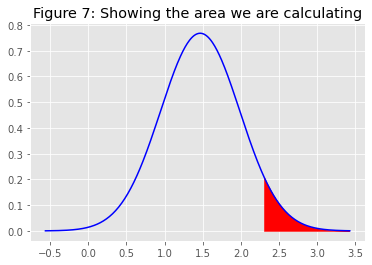

In [19]:
plt.style.use('ggplot')
plt.plot(values_wait_time, est_wt_log_norm.pdf(values_wait_time),'b')

px = np.arange(np.log(10), wait_time_log.max(), 0.01)
plt.fill_between(px, est_wt_log_norm.pdf(px), color='r')

plt.title('Figure 7: Showing the area we are calculating')
plt.show()

And this quantity is the same as 1 - the left tail, so we can calculate it as the cdf up to log(10) from 0 and subtract from 1.

In [20]:
prob_10 = 1 - norm(wait_time_log_mean, wait_time_log_std).cdf(np.log(10))
print('The probability of waiting longer than 10 minutes is: ', round(prob_10, 5))

The probability of waiting longer than 10 minutes is:  0.05379


Using a log-normal assumption of the data, we calculate probability of waiting for longer than 10 minutes as ~ 5.38%.

In [21]:
sum(wait_time_data > 10) / len(wait_time_data)

0.0532

If we do the calculation non-parametrically: we see that the probability of waiting for long than 10 minutes is ~ 5.32%, which is similar to the log-normal assumption.

## 3.2 ii) probability that the number of visitors is less than 46

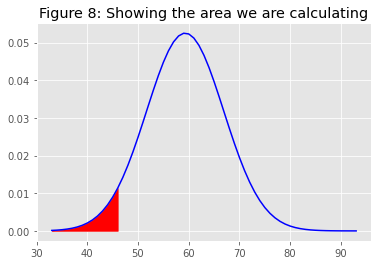

In [22]:
plt.style.use('ggplot')
plt.plot(values, visitor_norm.pdf(values),'b')

px = np.arange(33, 47, 1)
plt.fill_between(px, visitor_norm.pdf(px),color='r')

plt.title('Figure 8: Showing the area we are calculating')
plt.show()

In [23]:
visitor_mean = visitor_data.mean()
visitor_std = visitor_data.std()

In [24]:
prob_46 = norm(visitor_mean, visitor_std).cdf(46)
print('The probability of less than 46 visitors is:', round(prob_46, 5))

The probability of less than 46 visitors is: 0.04015


Using a normal assumption, we find that the probability of the number of visitors being less than 46 is ~4%.

In [25]:
sum(visitor_data < 46) / len(visitor_data)

0.032

Using a non-parametric approach, we find that the probability of the number of visitors being less than 46 is ~ 3.2%. This is due to the heavier right tail of the distribution, which under a normal assumption pulls the mean of the distribution to a higher value (Figure 3).

### 3.3 What is the relationship between these these two sets of data? How can we model this (if at all)?

In [26]:
xs = np.array(visitor_data).reshape(-1,1)
ys = np.array(wait_time_log).reshape(-1, 1)

In [27]:
linear_model = LinearRegression()

linear_model.fit(xs, ys)

wait_time_log_pred = linear_model.predict(xs)

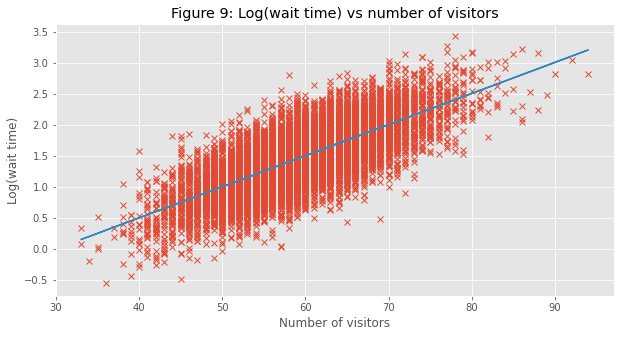

In [28]:
plt.figure(figsize = (10, 5))
plt.title('Figure 9: Log(wait time) vs number of visitors')
plt.plot(visitor_data, wait_time_log, 'x')
plt.plot(xs, wait_time_log_pred)
plt.ylabel('Log(wait time)')
plt.xlabel('Number of visitors')
plt.show()

In [29]:
r2_wt_visitors = round(r2_score(ys, wait_time_log_pred), 4)
print('The R^2 between log(wait time) and number of visitors is:', r2_wt_visitors)

The R^2 between log(wait time) and number of visitors is: 0.5394


The relationship between log(wait time) and number of visitors seems to be linear. The R^2 of the relationship is ~0.54.

### 3.4 Rana is not happy with the current website. She has received many complaints of clients taking far too long to login. You wonder whether the system is being overwhelmed by large numbers of visitors. Calculate the probability that when we have 50 or more visitors per hour, they can expect to wait more than 7.5 minutes to log on.

In [30]:
# Parameters for the number of visitors (assume mean and standard deviation)
visitors_mean = visitor_data.mean()
visitors_std = visitor_data.std()

# Parameters for the wait time (assume mean and standard deviation)
wait_time_mean = wait_time_log.mean()
wait_time_std = wait_time_log.std()

visitors_prob = 1 - stats.norm.cdf(50, loc=visitors_mean, scale=visitors_std)

# Calculate the probability of waiting more than 7.5 minutes given that there are 50 or more visitors per hour
conditional_probability = 1 - stats.norm.cdf(np.log(7.5), loc=wait_time_mean, scale=wait_time_std)

# Calculate the conditional probability
conditional_probability /= visitors_prob

print("Conditional Probability:", round(conditional_probability, 5)) 

Conditional Probability: 0.16374


The probability of having to wait more than 7.5 minutes, given 50 or more visitors and hour is ~16.4%.

In [31]:
data_50 = data[data['number of visitors'] > 50]
sum(data_50['estimated wait time (mins)'] > 7.5) / len(data)

0.1436

### 3.5 You are provided with an additional set of returns data, for 10 assets A-J, in the 'tick data' sheet of the excel. Some of these asset returns are genuine, whilst others have been simulated. Determine which assets are real and which are fake/simulated, explaining in detail how you did so.


In [32]:
tick_data = pd.read_excel('data.xlsx', 'tick data')

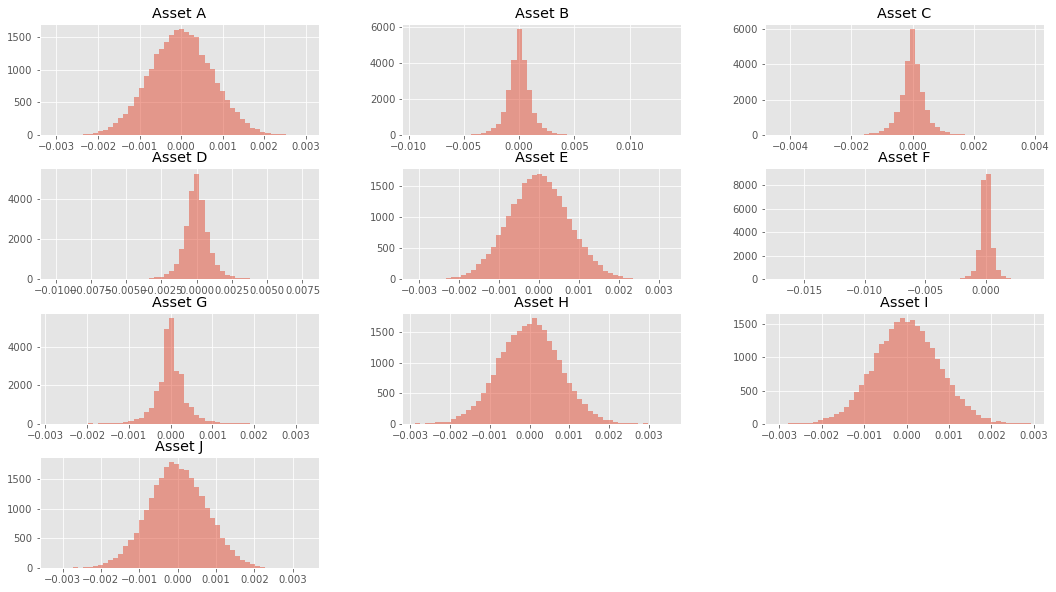

In [33]:
# Load the returns data from the 'tick data' sheet of the Excel file
returns_data = pd.read_excel('data.xlsx', 'tick data')

# Step 2: Statistical Summary
summary_statistics = returns_data.describe()

# Step 3: Visualize the Data
returns_data.hist(bins=50, alpha=0.5, figsize=(18, 10))
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend(returns_data.columns)
plt.show()

From the above histograms we can see that Asset B, C, D, F and G exhibit high peaks. It is difficult to visually see the extent of the tails, so we will calculate some summary statistics (especially kurtosis) to evaluate the tails.

In [34]:
stats_pd = pd.DataFrame({'Mean': round(returns_data.mean(), 5),
                         'Median': round(returns_data.median(), 5),
                         'Std': returns_data.std(),
                         'Skew': returns_data.skew(),
                         'Kurtosis': returns_data.kurtosis()})
stats_pd

,Mean,Median,Std,Skew,Kurtosis
Asset A,0.00000,0.00000,0.000753,0.018388,-0.031174
Asset B,-0.00001,0.00000,0.001145,0.171612,5.852532
Asset C,-0.00000,0.00000,0.000435,0.028124,4.910682
Asset D,-0.00001,-0.00001,0.000962,0.030097,4.936043
Asset E,-0.00000,-0.00000,0.000756,0.004274,0.036528
Asset F,-0.00001,0.00000,0.000531,-1.398887,48.225848
Asset G,0.00000,0.00000,0.000353,0.083216,3.997894
Asset H,-0.00000,0.00001,0.000756,0.002284,-0.001301
Asset I,0.00000,0.00000,0.000758,0.017199,-0.016427
Asset J,-0.00001,-0.00001,0.000748,0.008868,0.003103


Looking at the above table, the mean, median, std and skew don't offer too much help in identifying the simulated assets - they all have means and medians of ~0, with somewhat symmetric skews (apart from Asset F).

By looking at the kurtosis (4rd moment) of the dataset, we identify Asset B, C, D, F and G as having non-zero kurtosis, which is characteristic of actual asset returns.

Assets A, E, H, I, J have close-to-zero kurtosis

To assess the normality assumption we can make use of quantile-quantile plots (Q-Q). These essentially plot the theoretical quantiles of data to the data. Visually, this is useful, as a normal distribution (after standardising) should lay on the $y=x$ line (i.e: theoretical quantile = sample quantile).

In [35]:
def normalise_data(rets):
    """
        This function normalises data, for the use of the qq plots.
    """
    return (rets - rets.mean()) / rets.std()

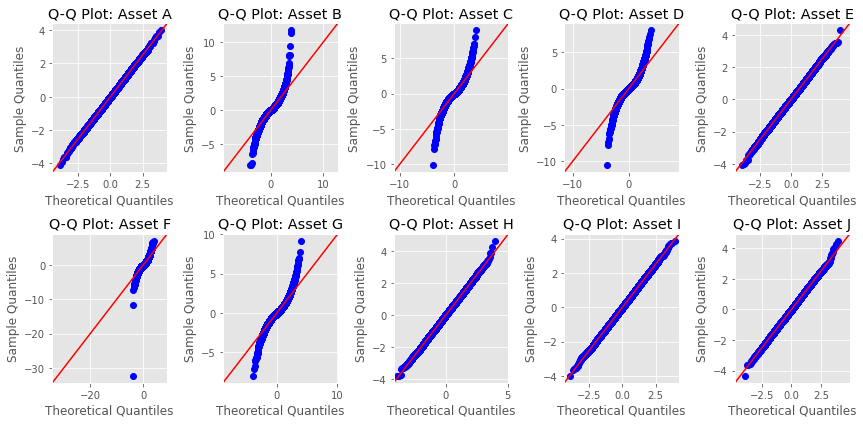

In [36]:
import warnings

# Create a figure and a set of subplots with a 2x5 grid
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

# Flatten the axes array to iterate over it easily
axes = axes.flatten()

# Iterate over the axes and create Q-Q plots for each subplot
for i, ax in enumerate(axes):
    # Generate Q-Q plot for the i-th column of data
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        sm.qqplot(normalise_data(returns_data.iloc[:, i]), line='45', ax=ax)
    
    # Customize subplot labels, titles, etc.
    ax.set_title(f"Q-Q Plot: {returns_data.columns[i]}")
    ax.set_xlabel("Theoretical Quantiles")
    ax.set_ylabel("Sample Quantiles")
    ax.grid(True)

# Adjust the spacing between subplots and display the figure
plt.tight_layout()
plt.show()

Once again, Asset B, C, D, F and G break the normality assumption. The plots show that these assets exhibit fat tails.

To statistically assess which asset returns are simulated, and which are real, we can look are a few additional tests of normality. Namely, the shapiro and jarque-bera tests.

For Shapiro:

- If the p-value ≤ 0.05, then we reject the null hypothesis i.e. we assume the distribution of our variable is not normal/gaussian.
- If the p-value > 0.05, then we fail to reject the null hypothesis i.e. we assume the distribution of our variable is normal/gaussian.



In [37]:
shapiro_pd = pd.DataFrame(index = returns_data.columns, columns = ['statistic', 'pvalue'])

for col in returns_data.columns:
    running_test = shapiro(returns_data[col])
    shapiro_pd.loc[col, 'statistic'] = running_test.statistic
    shapiro_pd.loc[col, 'pvalue'] = running_test.pvalue
shapiro_pd

/Users/robertblomqvist/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,statistic,pvalue
Asset A,0.999925,0.724396
Asset B,0.948529,0.0
Asset C,0.947459,0.0
Asset D,0.94785,0.0
Asset E,0.999928,0.757353
Asset F,0.912708,0.0
Asset G,0.955745,0.0
Asset H,0.9999,0.418243
Asset I,0.999923,0.700698
Asset J,0.999866,0.15764


For Jarque-Bera:

It measures whether the distribution has skewness and kurtosis matching a normal distribution.
- If the p-value ≤ 0.05, then we reject the null hypothesis i.e. we assume the distribution of our variable is not normal/gaussian.
- If the p-value > 0.05, then we fail to reject the null hypothesis i.e. we assume the distribution of our variable is normal/gaussian.


In [38]:
from scipy.stats import jarque_bera 

jb_pd = pd.DataFrame(index = returns_data.columns, columns = ['statistic', 'pvalue'])
for col in returns_data.columns:
    running_test = jarque_bera(returns_data[col])
    jb_pd.loc[col, 'statistic'] = running_test.statistic
    jb_pd.loc[col, 'pvalue'] = running_test.pvalue
jb_pd

,statistic,pvalue
Asset A,2.436246,0.295785
Asset B,35784.802245,0.0
Asset C,25110.371969,0.0
Asset D,25370.868411,0.0
Asset E,1.447251,0.484991
Asset F,2429797.665652,0.0
Asset G,16669.312216,0.0
Asset H,0.024214,0.987966
Asset I,1.521548,0.467305
Asset J,0.336177,0.845279


The reason for testing for normality is that real asset return distributions simply do not follow a normal distribution exactly, and hence testing for the normal assumption we can determine which are likely simulated from a normal distribution, and which are not.

Next we will look at autocorrelation, namely if there is any correlation between returns at $t, t+1, ..., t+n$. However, we will use absolute returns for this task (stylized fact). Below we define a function to plot the absolute returns at t and t+1 for each asset, and a line of best fit. This will give a visual clue as to whether there is any auto correlation of returns.

If there is any dependency, then the slope of the graph should be positive.

In [39]:
def shift_ret_reg(returns):
    """ 
        This function runs a simple linear regression of return t+1 (y) vs return t (x),
        and outputs the prediction, the return t, return t+1 for ease of plotting.
    """
    returns = pd.DataFrame(returns)
    returns['Shifted_t1'] = returns.shift(1)
    returns = returns.dropna()

    lin_A = LinearRegression()

    lin_A.fit(np.array(abs(returns.iloc[:,0])).reshape(-1, 1), np.array(abs(returns.iloc[:,1])).reshape(-1, 1))

    pred_A = lin_A.predict(np.array(abs(returns.iloc[:,0])).reshape(-1,1))
    
    return pred_A, returns.iloc[:,0], returns.iloc[:,1]

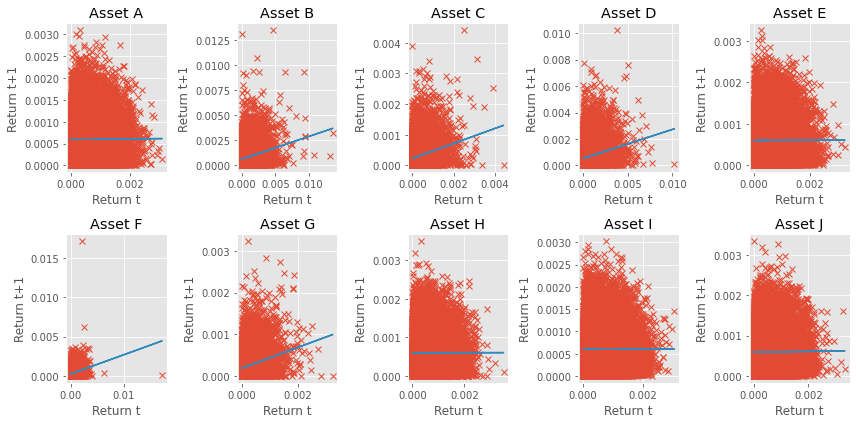

In [40]:
# Create a figure and a set of subplots with a 2x5 grid
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

# Flatten the axes array to iterate over it easily
axes = axes.flatten()

for i, ax in enumerate(axes):
   
    # Selecting the asset columns
    prediction, x_t, y_t1 = shift_ret_reg(returns_data.iloc[:,i])
    
    ax.plot(abs(x_t), abs(y_t1), 'x')
    ax.plot(abs(x_t), prediction)
    # Customize subplot labels, titles, etc.
    ax.set_title(f"{returns_data.columns[i]}")
    ax.set_xlabel("Return t")
    ax.set_ylabel("Return t+1")
    ax.grid(True)

# Adjust the spacing between subplots and display the figure
plt.tight_layout()
plt.show()

Again, Asset B, C, D, F and G exhibit behaviour of real assets.

Below we do a similar exercise, but look at the autocorrelation (ACF) with various lags. This shows the running correlation between return t to t+n. Again, we run it on absolute returns.

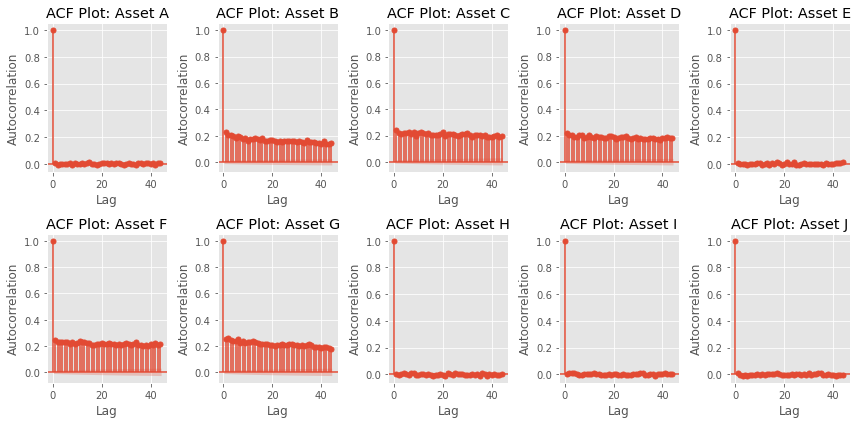

In [41]:
# Create a figure and a set of subplots with a 2x5 grid
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

# Flatten the axes array to iterate over it easily
axes = axes.flatten()

# Iterate over the axes and create ACF plots for each subplot
for i, ax in enumerate(axes):
    # Generate ACF plot for the i-th column of data
    plot_acf(abs(returns_data.iloc[:, i]), ax=ax) # the plot_acf function runs acf with lags of 50, and creates a plot
    
    # Customize subplot labels, titles, etc.
    ax.set_title(f"ACF Plot: {returns_data.columns[i]}")
    ax.set_xlabel("Lag")
    ax.set_ylabel("Autocorrelation")
    ax.grid(True)

# Adjust the spacing between subplots and display the figure
plt.tight_layout()
plt.show()

Once again, Assets B, C, D, F and G exhibit autocorrelation, and the other assets do not.

So, from the various checks and tests we conclude that Assets B, C, D, F and G are real.